**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#NLP Packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# PAckages for models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# packages for avoiding warning data. 
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [ ]:
amazon_reviews = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')
amazon_reviews.head()
#print(amazon_reviews['Score'].value_counts())

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Looking for number of words per review**

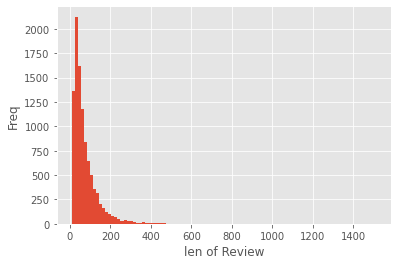

data in words_per_review


0        48
1        31
2        94
3        41
4        27
       ... 
9995     74
9996     80
9997    174
9998     24
9999    198
Name: Text, Length: 10000, dtype: int64

In [ ]:
words_per_review = amazon_reviews.Text.apply(lambda x:len(x.split()))
words_per_review.hist(bins = 100)
plt.xlabel("len of Review")
plt.ylabel("Freq")
plt.show()
print("data in words_per_review")
words_per_review

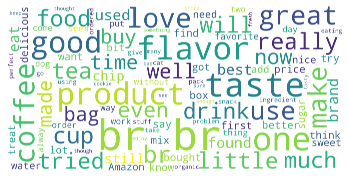

In [ ]:
word_cloud_text = ''.join(amazon_reviews['Text'])
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="white",
                      scale = 10, width=800,height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**Standardizing the ratings for sentiment analysis**

In [ ]:
# Mapping the ratings
# amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3,1,0)

# ## Removing neutral reviews 
amazon_reviews = amazon_reviews[amazon_reviews.Score != 5]
# # if amazon_reviews.Score==3:
# #   amazon_reviews['Sentiment_rating']=2
# amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score = 3,2)

# # Printing the counts of each class
# counts= amazon_reviews['Sentiment_rating'].value_counts()
# print(counts)

# amazon_reviews.head(3)

def sentiment(n):
    if n==3:
      return 0 #neutral 
    elif n <3:
      return 1 #for negative
    else:
      return 2 #for positive review.
amazon_reviews['Sentiment_rating']  = amazon_reviews['Score'].apply(sentiment)
amazon_reviews
#amazon_reviews['Sentiment_rating'].value_counts()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_rating
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,2
12,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,1
...,...,...,...,...,...,...,...,...,...,...
9982,B0032AM8H8,A312MFKWEGW6PV,"Cassiopeia ""CJ""",0,0,3,1296691200,"Tasty tea, limited help for heartburn","This is a pleasant tea, it tastes mostly of ch...",0
9985,B000P41A28,A2OOCPLJM7I4VA,"Victoria Compton ""Hyakamooks""",38,48,1,1222646400,"Constipation + Sucrose = No, thanks!",You think you're doing something good for your...,1
9986,B000P41A28,AMZ97CCWOB453,Pregbaby,18,24,2,1249948800,Read this article first,"2.0 out of 5 stars Read this article first, Au...",1
9995,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,1


In [ ]:
amazon_reviews['reviews_text_new'] = amazon_reviews['Text'].str.lower()
amazon_reviews

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_rating,reviews_text_new
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled as jumbo salted peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2,this is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1,if you are looking for the secret ingredient i...
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,2,i got a wild hair for taffy and ordered this f...
12,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,1,my cats have been happily eating felidae plati...
...,...,...,...,...,...,...,...,...,...,...,...
9982,B0032AM8H8,A312MFKWEGW6PV,"Cassiopeia ""CJ""",0,0,3,1296691200,"Tasty tea, limited help for heartburn","This is a pleasant tea, it tastes mostly of ch...",0,"this is a pleasant tea, it tastes mostly of ch..."
9985,B000P41A28,A2OOCPLJM7I4VA,"Victoria Compton ""Hyakamooks""",38,48,1,1222646400,"Constipation + Sucrose = No, thanks!",You think you're doing something good for your...,1,you think you're doing something good for your...
9986,B000P41A28,AMZ97CCWOB453,Pregbaby,18,24,2,1249948800,Read this article first,"2.0 out of 5 stars Read this article first, Au...",1,"2.0 out of 5 stars read this article first, au..."
9995,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,1,we switched from the advance similac to the or...


In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

# For reviews not converted to lowe case
token_lists = [word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens before lowering the sentences: ",len(set(tokens)))

# For reviews converted to lowe case
token_lists_lower = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens after lowering the sentences: ",len(set(tokens_lower)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Number of unique tokens before lowering the sentences:  18185
Number of unique tokens after lowering the sentences:  15076


**Replacing Non AlphaNumeric values to blank**

In [ ]:
amazon_reviews['reviews_text_new'] = amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
eng_stop_words = stopwords.words('english')
eng_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Applying Bag Of Words to "Text column"**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
y = amazon_reviews['Sentiment_rating']
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=eng_stop_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(amazon_reviews['reviews_text_new']).toarray()
bow_data



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Train and test data splitting(Bag of Words)**

In [ ]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    amazon_reviews['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

**LOGISCTIC REGRESSION**

In [ ]:
### Training the model 
### LOGISTIC REGRESSION WITH BAG OF WORDS

lr_model_all = LogisticRegression(multi_class='multinomial') # Logistic regression
lr_model= lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

In [ ]:
## Predicting the output
test_pred_lr_all = lr_model.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all,average='weighted'))

F1 score:  0.6284145603404473


**RANDOM FOREST CLASSIFIER**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)  ####################  BAG OF WORDS and Random Clssifier. 
rfc.fit(X_train_bow,y_train_bow)

y_pred=rfc.predict(X_test_bow)

print("F1 score: ",f1_score(y_test_bow,y_pred,average='weighted'))

F1 score:  0.6290719646841479


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_bow, y_train_bow)
gnb_predictions = gnb.predict(X_test_bow)
print("F1 score: ",f1_score(y_test_bow,gnb_predictions,average='weighted'))

F1 score:  0.45465439753233955


**TF-IDF Applied on "TEXT" column**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=eng_stop_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(amazon_reviews['reviews_text_new'])
tfidf_data

<3817x12224 sparse matrix of type '<class 'numpy.float64'>'
	with 140666 stored elements in Compressed Sparse Row format>

**Train - test split (Tf-Idf)**

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            amazon_reviews['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

**Applying logistic regression to TF-IDF features**

F1 score:  0.6397973438336954
Test values
1    332
2    275
0    157
Name: Sentiment_rating, dtype: int64
Predicted values: 
Num:of:Zeroes:  70
Num:of:ones:  383
Num:of:two's:  311


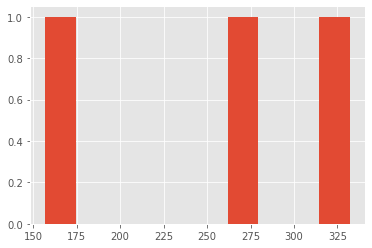

In [ ]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_tfidf, test_pred_lr_all,average='weighted'))

y_test_tfidf.value_counts().hist()
print("Test values")
print(y_test_tfidf.value_counts())
print("Predicted values: ")
#test_pred_lr_all.counts()
count1=0
count2=0
count0=0
for i in test_pred_lr_all:
  if i==1:
    count1+=1
  elif i==2:
    count2+=1
  else:
    count0+=1
print("Num:of:Zeroes: ",count0)
print("Num:of:ones: ",count1)
print("Num:of:two's: ",count2)

**Applying RandomForest classifier to TF-IDF features**

In [ ]:
rfc_tf = RandomForestClassifier(n_estimators=100)
rfc_tf.fit(X_train_tfidf,y_train_tfidf)

y_pred=rfc_tf.predict(X_test_tfidf)

print("F1 score: ",f1_score(y_test_tfidf,y_pred,average='weighted'))

F1 score:  0.6340707178142835


**Manual Testing of Logistic regression(Bag-of-words)**

In [ ]:
test_feature = bow_counts.transform(['movie is good'])
aaa=lr_model.predict(test_feature)
if aaa == 1:
  print("negative")
elif aaa==0:
  print("neutral")
else:
  print("positive")

positive


**Manual Testing of Logistic regression (TF-IDF)**

In [ ]:
test_feature = tfidf_counts.transform(['movie is okay'])
aaa=lr_model_tf_idf.predict(test_feature)
if aaa == 1:
  print("negative")
elif aaa==0:
  print("neutral")
else:
  print("positive")

neutral


In [ ]:
import pickle

In [ ]:
pick1 = {
    'vectorizer':tfidf_counts,
    'model':lr_model_tf_idf
}
pickle.dump(pick1,open('models'+".p","wb"))